In [1]:
import numpy as np
from math import sqrt,log10

from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq, minimize_scalar

from profiles import build_profile, build_kernel
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
from fitter import MinuitFitter

import pylab as plt
%matplotlib inline

In [2]:
directory = '/home/andrea/Desktop/work/DWARF/dsphsim/'
rh = 0.04
D = 39.81
theta = 2*rh/D
dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf}

In [3]:
dm = build_profile('NFW')
st = build_profile('plummer',rh=rh) # Plummer Stellar profile
kr = build_kernel('constbeta') # isotropic kernel
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)

In [34]:
R, v = np.loadtxt(directory+'Ret2_data/dsph_002.txt',usecols=(5, 7),unpack=True)
vnan = np.isnan(v)
v = v[~vnan]
R = R[~vnan]
dv = np.zeros_like(v)

In [35]:
LL = GaussianLikelihood([R, v, dv, 0.], Sigma)
LL.set_free('dm_r0')
#LL.set_free('dm_a')
#LL.set_free('dm_b')
#LL.set_free('dm_c')
#LL.set_free('ker_beta')

In [42]:
Jtrue = 16.72
rtrue = 0.35
Jmle = 16.84
rmle = 0.15

In [37]:
LL.free_pars

{'J': 18, 'dm_r0': {'val': 0.774263682681127}}

In [40]:
r_arr = np.logspace(-2,0)
J_arr = np.linspace(16,18)
res = np.zeros(shape=(len(r_arr), len(J_arr)))
for i,r in enumerate(r_arr):
    for j,J in enumerate(J_arr):
        res[i,j] = LL.contour(J,r)

In [43]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    ticks = {'0.5':1,'2.0':2,'4.5':3}
    return r'${}\sigma$'.format(ticks[format(x)])

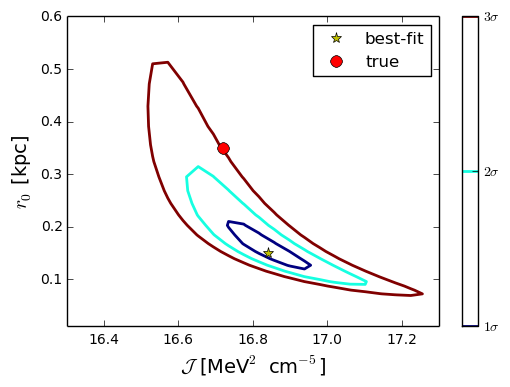

In [69]:
plt.contour(J_arr, r_arr, res-res.min(),[0.5, 2.0, 4.5],linewidths=2)
plt.colorbar(format=ticker.FuncFormatter(fmt))
plt.plot(Jmle, rmle, 'y*',label='best-fit', markersize=8)
plt.plot(Jtrue, rtrue, 'ro',label='true', markersize=8)
plt.xlabel(r'$\mathcal{J}$ [MeV$^2$ cm$^{-5}$]',fontsize=14)
plt.ylabel(r'$r_0$ [kpc]',fontsize=14)
plt.legend(numpoints=1).get_frame().set_facecolor('w')
plt.ylim(0.01,0.6);
plt.xlim(16.3,17.3);
#plt.savefig('results/LikeJr_contour.png', dpi=300, format='png')